In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)



In [2]:
%matplotlib notebook
plt.style.use('seaborn-notebook')

data = pd.read_csv(r'C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\ParticipantData_BTPC\\ParticipantData_BTPC\\Train.csv')
df = pd.DataFrame(data)

#df.drop(columns=['session_id','session_number','client_agent','date'], inplace=True)
print(df.shape)

(5429, 9)


In [3]:
#Obtaining the TEST dataset
data1 = pd.read_csv(r'C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\ParticipantData_BTPC\\ParticipantData_BTPC\\Test.csv')
df_test = pd.DataFrame(data1)
#df_test.drop(columns=['session_id','session_number','client_agent','date'], inplace=True)
print(df_test.shape)

(2327, 8)


In [4]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_year']=df['month'].astype(str)+'_'+df['year'].astype(str)
df['month_year'].nunique()

12

In [5]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year
df_test['month_year']=df_test['month'].astype(str)+'_'+df_test['year'].astype(str)
df_test['month_year'].nunique()

12

In [6]:
df2 = df[['device_details','month_year' , 'purchased','added_in_cart', 'checked_out', 'time_spent']]

In [7]:
df2_test = df_test[['device_details','month_year' , 'purchased','added_in_cart', 'checked_out']]

In [8]:
df2.head()
df4=df2.copy()

In [9]:
df2_test.head()
df4_test=df2_test.copy()

In [10]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
#df2['device_details']= label_encoder.fit_transform(df2['device_details'])
#df2['month_year']= label_encoder.fit_transform(df2['month_year']) 
#df2.head()

one_hot_encoded_device_details = pd.get_dummies(df4["device_details"],drop_first=True)
one_hot_encoded_device_details.head()
one_hot_encoded_month_year = pd.get_dummies(df4["month_year"],drop_first=True)
one_hot_encoded_month_year.head()
df4 = pd.concat([df2, one_hot_encoded_device_details], axis=1)
df4 = pd.concat([df4, one_hot_encoded_month_year], axis=1)
df4.drop(columns=['device_details', 'month_year'], inplace=True)
df4.head()

,purchased,added_in_cart,checked_out,time_spent,Android Phone - MobileWeb,Android Phone - Web,Android Tablet - Android,Android Tablet - MobileWeb,Android Tablet - Web,Desktop - Chrome,...,12_2019,1_2020,2_2020,3_2020,4_2020,5_2019,6_2019,7_2019,8_2019,9_2019
0,1,0,0,236.886,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1277.455,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,21.704,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,455.201,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1164.877,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
print(one_hot_encoded_device_details.sum())

Android Phone - MobileWeb       54
Android Phone - Web             86
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Android Tablet - Web           203
Desktop - Chrome               815
Desktop - Firefox              234
Desktop - IE                   292
Desktop - Safari               313
Other - Other                  185
Unknown - MobileWeb             87
iPad - Web                     289
iPad - iOS                      77
iPhone - MobileWeb             277
iPhone - Web                   665
iPhone - iOS                  1515
dtype: int64


In [12]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

one_hot_encoded_device_details_test = pd.get_dummies(df4_test["device_details"],drop_first=True)
one_hot_encoded_device_details_test.head()
one_hot_encoded_month_year_test = pd.get_dummies(df4_test["month_year"],drop_first=True)
one_hot_encoded_month_year_test.head()
df4_test = pd.concat([df2_test, one_hot_encoded_device_details_test], axis=1)
df4_test = pd.concat([df4_test, one_hot_encoded_month_year_test], axis=1)
df4_test.drop(columns=['device_details', 'month_year'], inplace=True)
df4_test.head()

,purchased,added_in_cart,checked_out,Android Phone - MobileWeb,Android Phone - Web,Android Tablet - Android,Android Tablet - Web,Desktop - Chrome,Desktop - Firefox,Desktop - IE,...,12_2019,1_2020,2_2020,3_2020,4_2020,5_2019,6_2019,7_2019,8_2019,9_2019
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
print(one_hot_encoded_device_details_test.sum())

Android Phone - MobileWeb     18
Android Phone - Web           26
Android Tablet - Android       5
Android Tablet - Web          96
Desktop - Chrome             366
Desktop - Firefox             93
Desktop - IE                 137
Desktop - Safari             130
Other - Other                 82
Unknown - MobileWeb           35
iPad - Web                   124
iPad - iOS                    44
iPhone - MobileWeb           152
iPhone - Web                 279
iPhone - iOS                 615
dtype: int64


In [14]:
df4_test['time_spent']=0
final_train, final_test = df4.align(df4_test, join='inner', axis=1) 

In [15]:
print(final_train.shape)
print(final_test.shape)

(5429, 30)
(2327, 30)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#X = df4.loc[ : , df4.columns != 'time_spent'] 
#y = df4['time_spent']

X = final_train.loc[ : , final_train.columns != 'time_spent'] 
y = final_train['time_spent']

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

(5429, 29)
(5429,)


In [17]:
# Deep learning models

In [18]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [19]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,105
Trainable params: 3,105
Non-trainable params: 0
_________________________________________________________________


In [20]:
checkpoint_name = 'C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\Model_Weights.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [21]:
history = NN_model.fit(X, y, epochs=50, batch_size=32, validation_split = 0.25, callbacks=callbacks_list)



Train on 4071 samples, validate on 1358 samples
Epoch 1/50
4064/4071 [============================>.] - ETA: 0s - loss: 3357499.2124 - mean_squared_logarithmic_error: 17.5971
Epoch 00001: val_loss improved from inf to 3349105.91476, saving model to C:\Users\Monishver\Desktop\ML-Ang\Datasets\Model_Weights.hdf5
4071/4071 [==============================] - 5s 1ms/sample - loss: 3352396.3224 - mean_squared_logarithmic_error: 17.5724 - val_loss: 3349105.9148 - val_mean_squared_logarithmic_error: 4.1670
Epoch 2/50
4064/4071 [============================>.] - ETA: 0s - loss: 3026331.6501 - mean_squared_logarithmic_error: 3.8457
Epoch 00002: val_loss improved from 3349105.91476 to 2835744.63154, saving model to C:\Users\Monishver\Desktop\ML-Ang\Datasets\Model_Weights.hdf5
4071/4071 [==============================] - 2s 516us/sample - loss: 3027943.1978 - mean_squared_logarithmic_error: 3.8493 - val_loss: 2835744.6315 - val_mean_squared_logarithmic_error: 4.8347
Epoch 3/50
4000/4071 [==========

Epoch 37/50
4032/4071 [============================>.] - ETA: 0s - loss: 2556343.6249 - mean_squared_logarithmic_error: 3.5916
Epoch 00037: val_loss improved from 2595791.13821 to 2594939.77941, saving model to C:\Users\Monishver\Desktop\ML-Ang\Datasets\Model_Weights.hdf5
4071/4071 [==============================] - 2s 468us/sample - loss: 2544133.7894 - mean_squared_logarithmic_error: 3.5902 - val_loss: 2594939.7794 - val_mean_squared_logarithmic_error: 3.4600
Epoch 38/50
4000/4071 [============================>.] - ETA: 0s - loss: 2560572.4939 - mean_squared_logarithmic_error: 3.5414
Epoch 00038: val_loss improved from 2594939.77941 to 2593475.86414, saving model to C:\Users\Monishver\Desktop\ML-Ang\Datasets\Model_Weights.hdf5
4071/4071 [==============================] - 1s 335us/sample - loss: 2543183.5645 - mean_squared_logarithmic_error: 3.5421 - val_loss: 2593475.8641 - val_mean_squared_logarithmic_error: 3.4981
Epoch 39/50
3904/4071 [===========================>..] - ETA: 0s - l

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])

<IPython.core.display.Javascript object>


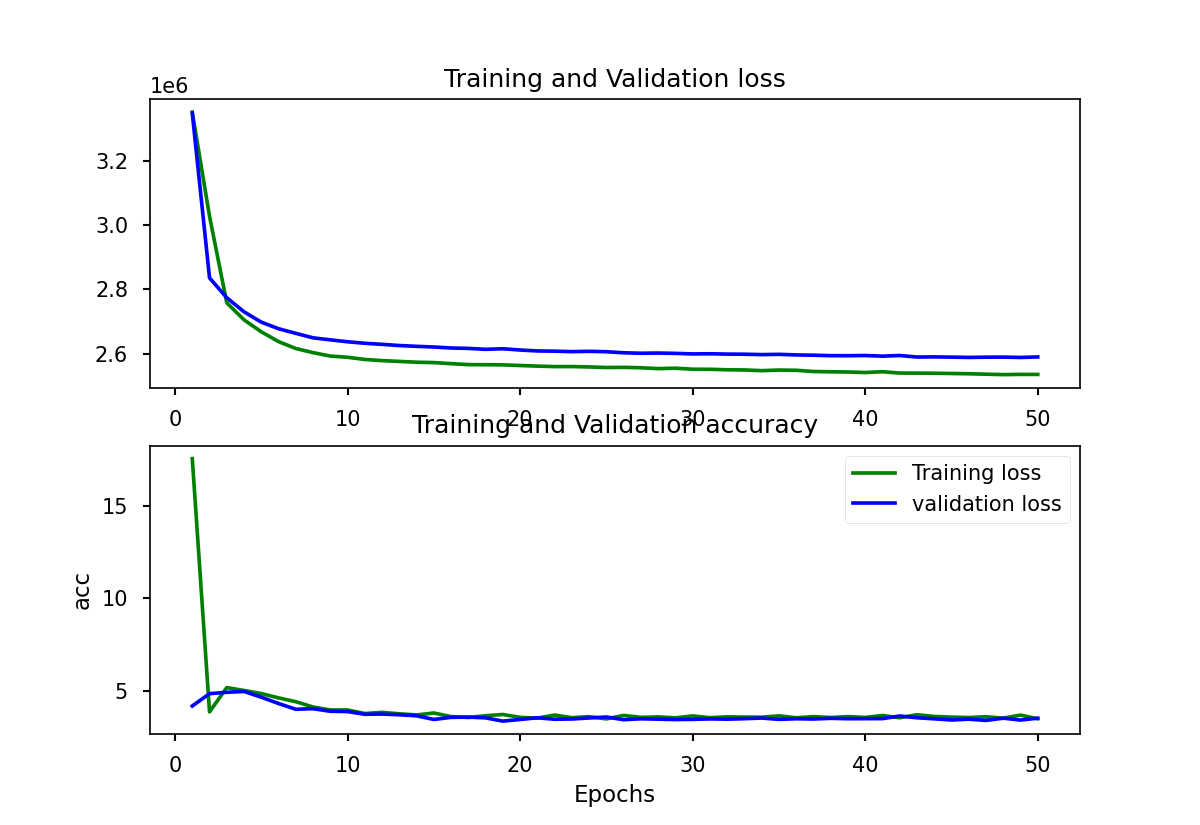

In [23]:

fig, (ax1, ax2)  = plt.subplots(2, 1,
                                sharex='row')



In [24]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
ax1.plot(epochs, loss_train, 'g', label='Training loss')
ax1.plot(epochs, loss_val, 'b', label='validation loss')
ax1.set_title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


acc_train = history.history['mean_squared_logarithmic_error']
acc_val = history.history['val_mean_squared_logarithmic_error']
epochs = range(1,51)
ax2.plot(epochs, acc_train, 'g', label='Training loss')
ax2.plot(epochs, acc_val, 'b', label='validation loss')
ax2.set_title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

No handles with labels found to put in legend.


In [25]:
# Load wights file of the best model :
import h5py
wights_file = 'C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\Model_Weights.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()])


In [26]:
# ML models

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [28]:
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train, y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)


print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))
print('RMSLE on train data: ', np.sqrt(mean_squared_log_error( y_train, predict_train )))
print('RMSLE on test data: ',  np.sqrt(mean_squared_log_error( y_test, predict_test )))

RMSE on train data:  1546.369894752592
RMSE on test data:  1448.5336920765458
RMSLE on train data:  1.8091723764226422
RMSLE on test data:  1.9280998967821652


In [29]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [30]:
models_scores = [] # To store model scores

def rmsle(model):
    model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    #y = np.expm1((y + abs(y.min())) / 200)
    #y_trans = np.log1p(y)
    #yhat = target_scaler.inverse_transform(predict_test)
    yhat = [0 if i < 0 else i for i in predict_test]
    return np.sqrt(mean_squared_log_error( y_test, yhat ))                  

In [31]:
linear_regression = make_pipeline(LinearRegression())
score = rmsle(linear_regression)

models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

LinearRegression Score= 2.237587435462266


In [32]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=0))

score = rmsle(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

Lasso Score= 2.2374725238820483


In [33]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=2000, learning_rate=0.03,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=20, min_samples_split=10, 
                                   loss='huber', random_state = 0)

score = rmsle(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

GradientBoostingRegressor Score= 1.6697056188029016


In [34]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.468, 
                             learning_rate=0.005, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1, random_state = 0)
score = rmsle(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

XGBRegressor Score= 1.9945990270751044


In [35]:
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state = 0)

score = rmsle(lgbm_regressor)
models_scores.append(['LGBMRegressor', score])
print(f'LGBMRegressor Score= {score}')

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
LGBMRegressor Score= 1.938700940294824


In [36]:
scores = pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
2,GradientBoostingRegressor,1.669706
4,LGBMRegressor,1.938701
3,XGBRegressor,1.994599
1,Lasso,2.237473
0,LinearRegression,2.237587


In [37]:
df4_test.head()

,purchased,added_in_cart,checked_out,Android Phone - MobileWeb,Android Phone - Web,Android Tablet - Android,Android Tablet - Web,Desktop - Chrome,Desktop - Firefox,Desktop - IE,...,1_2020,2_2020,3_2020,4_2020,5_2019,6_2019,7_2019,8_2019,9_2019,time_spent
0,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
final_test.head()
print(final_test.shape)
print(X_train.shape)

(2327, 30)
(4071, 29)


In [41]:
test = final_test.drop('time_spent', axis=1)
test_prediction = gradient_boosting_regressor.predict(test)
print(test_prediction)


submission_df = pd.DataFrame(test_prediction, columns=['time_spent'])
submission_df.to_csv('C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\ParticipantData_BTPC\\ParticipantData_BTPC\\my_submission_file.csv', index=False)


[775.66718134 250.2481929  640.52966804 ... 211.90920502 844.13293333
 828.21921038]


In [40]:
test_prediction = NN_model.predict(test)
print(test_prediction)


submission_df = pd.DataFrame(test_prediction, columns=['time_spent'])
submission_df.to_csv('C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\ParticipantData_BTPC\\ParticipantData_BTPC\\my_submission_file.csv', index=False)


[[ 829.584  ]
 [ 197.23627]
 [1356.7999 ]
 ...
 [ 251.16   ]
 [1230.7638 ]
 [1152.8123 ]]
